In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [107]:
data = pd.read_csv('dataset/segmentation data.csv')

In [108]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


# Exploratory Data Analysis

In [109]:
#check information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [110]:
#check statistics information of dataset
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [111]:
#check missing values in dataset
missing_values = data.isnull().sum()
print('missing values in this dataset: \n{}'.format(missing_values))

missing values in this dataset: 
ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [112]:
#check duplicate data

duplicate_data = data.duplicated().sum()
print('duplicate data in this datasets: {}'.format(duplicate_data))

duplicate data in this datasets: 0


In [113]:
clean_data = data.drop(['ID'], axis=1)
clean_data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


0    1086
1     914
Name: Sex, dtype: int64


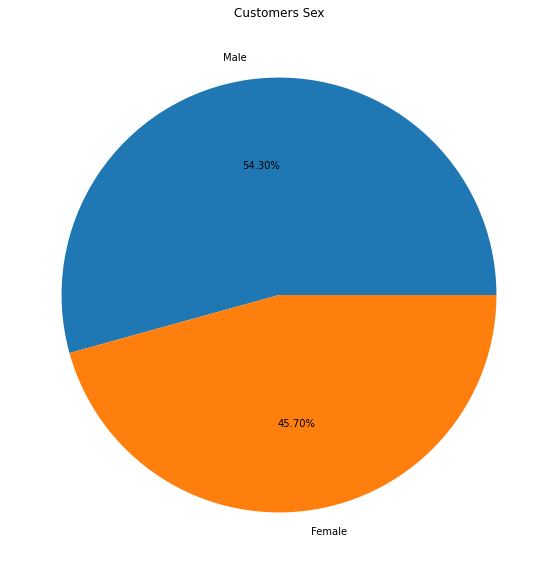

In [114]:
#Analysis for data_Sex {'0':'male', '1':'female'}

labels = ['Male', 'Female']
data_sex = clean_data['Sex'].value_counts()

print(data_sex)

plt.figure(figsize=(13,10))
plt.title("Customers Sex")
plt.pie(x=data_sex, labels=labels, autopct='%.2f%%')
plt.show()

0    1007
1     993
Name: Marital status, dtype: int64


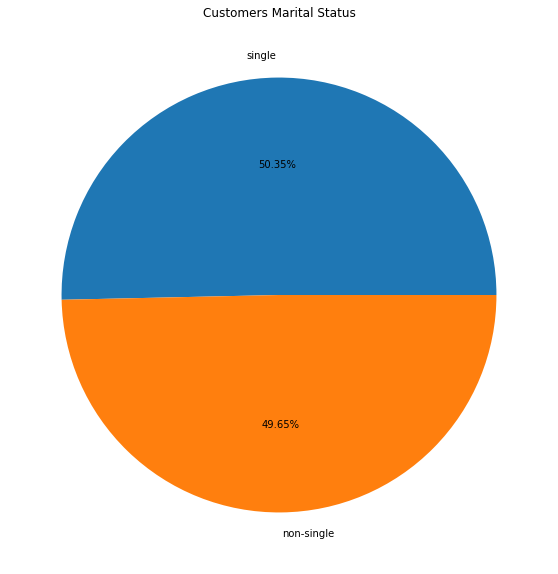

In [115]:
#analysis for marital status {'0': 'single', '1': 'non-single'}

labels = ['single', 'non-single']
data_marital_status = clean_data['Marital status'].value_counts()

print(data_marital_status)
plt.figure(figsize=(13,10))
plt.title('Customers Marital Status')
plt.pie(x = data_marital_status, labels=labels, autopct='%.2f%%')
plt.show()

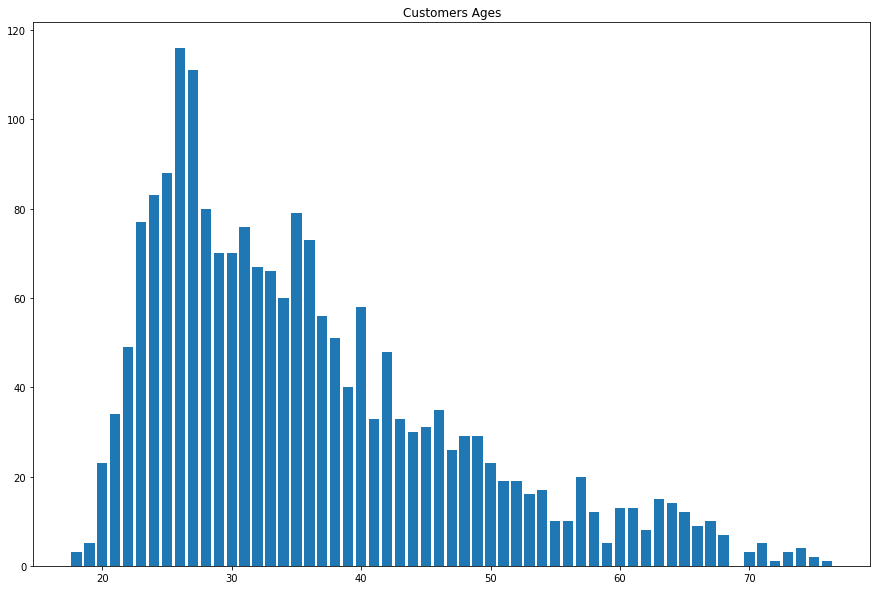

In [116]:
#analysis for data_age

data_age = clean_data['Age'].value_counts().sort_index()
labels = clean_data['Age'].value_counts().sort_index().index

plt.figure(figsize=(15,10))
plt.title('Customers Ages')
plt.bar(x=labels, height=data_age)
plt.show()

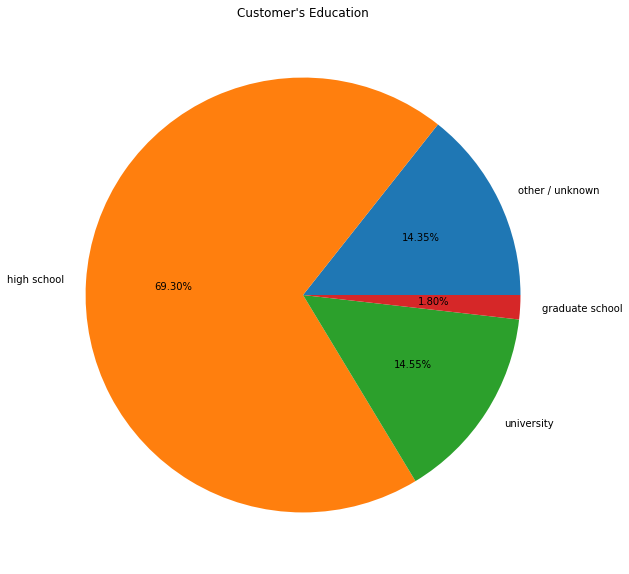

In [117]:
# Analysis for customer's education
# {0: other/unknown, 1: high school, 2: university, 3: graduate school}

data_education = clean_data['Education'].value_counts().sort_index()
labels = ['other / unknown', 'high school', 'university', 'graduate school']

plt.figure(figsize = (13, 10))
plt.title("Customer's Education")
plt.pie(x = data_education, labels=labels, autopct='%.2f%%')
plt.show()


In [118]:
data_income = clean_data['Income']
print('minimum income customers: {}\nmaximum income customers: {}\naverage income customers: {}'.format(min(data_income), max(data_income), np.average(data_income)))

minimum income customers: 35832
maximum income customers: 309364
average income customers: 120954.419


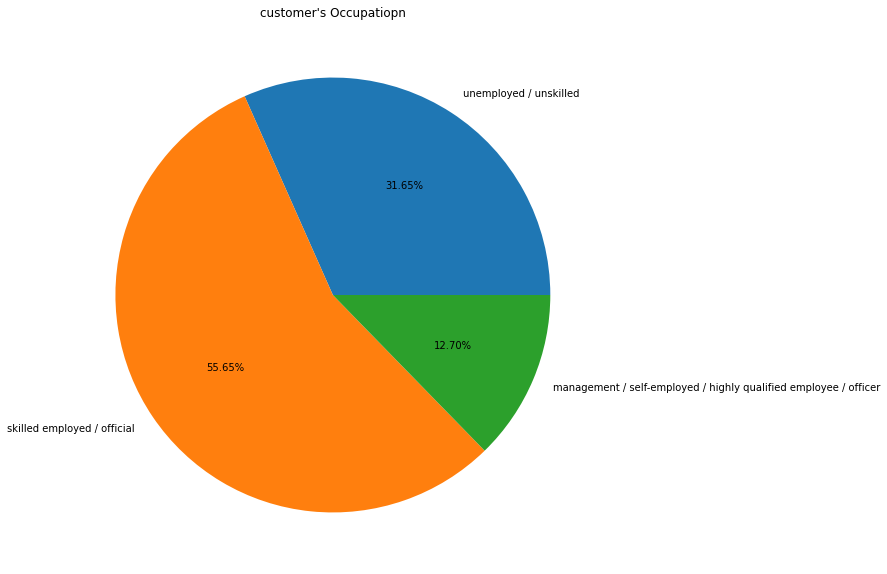

In [119]:
# analysis for customers occupation
# {0: unemployed / unskilled, 1: skilled employed / official, 2: management / self-employed / highly qualified employee / officer}

data_occupation = clean_data['Occupation'].value_counts().sort_index()
labels = ['unemployed / unskilled', 'skilled employed / official', 'management / self-employed / highly qualified employee / officer']

plt.figure(figsize=(13,10))
plt.title("customer's Occupatiopn")
plt.pie(x= data_occupation, labels=labels, autopct='%.2f%%')
plt.show()

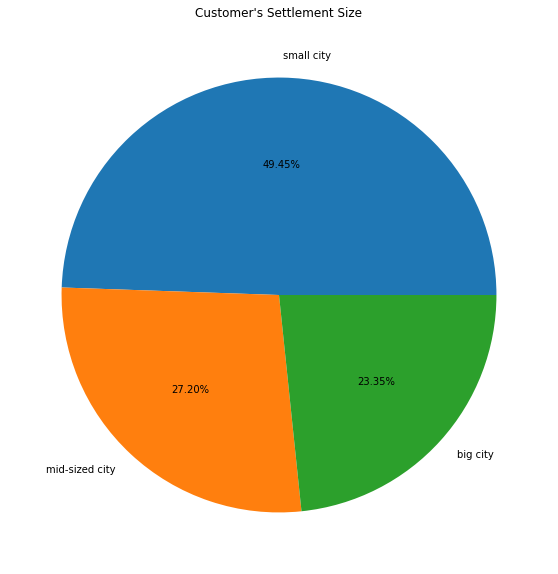

In [120]:
# Analysis for Customer's Settlement Size
# {0: small city, 1: mid-sized city, 2: big city}

data_settlement_size = clean_data['Settlement size'].value_counts().sort_index()
labels = ['small city', 'mid-sized city', 'big city']

plt.figure(figsize=(13,10))
plt.title("Customer's Settlement Size")
plt.pie(x = data_settlement_size, labels=labels,autopct ='%.2f%%')
plt.show()

# Data Preprocessing

In [121]:
# scaler = StandardScaler()
# scaler.fit(clean_data)
# x = scaler.transform(clean_data)
x = np.array(clean_data)

In [122]:
inertia = []
for k in range(1,11):
    kmeans_model = KMeans(n_clusters=k, random_state=42).fit(x)
    inertia.append(kmeans_model.inertia_)

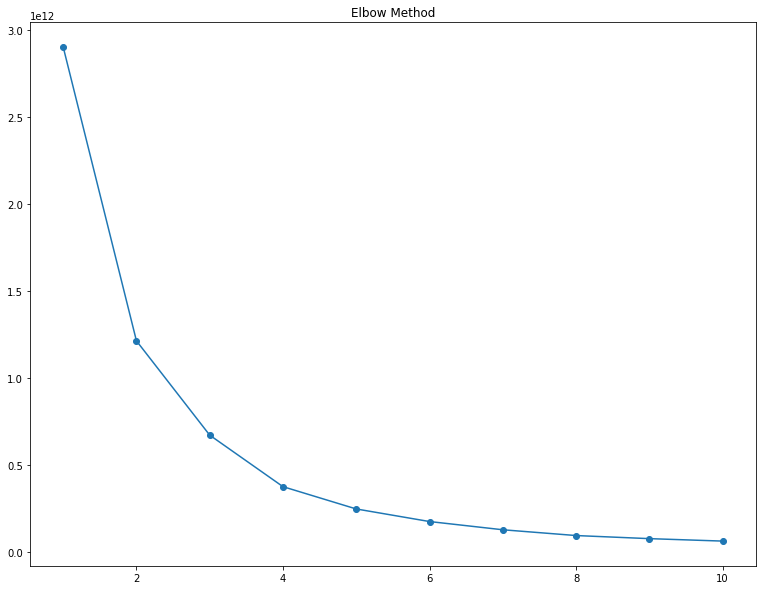

In [123]:
plt.figure(figsize = (13,10))
plt.title('Elbow Method')
plt.plot(range(1,11), inertia, marker="o")
plt.show()

In [124]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [125]:
pca = PCA(2)

#Transform the data
data_plot = pca.fit_transform(x)

In [126]:
label = kmeans.fit_predict(data_plot)

In [127]:
print('score: {}'.format(silhouette_score(x, label)))

score: 0.5428478909695625


In [128]:
y_df = pd.DataFrame(label)
y_values = y_df.value_counts().sort_index()
y_labels = y_df.value_counts().sort_index().index
y_values

0    954
1    105
2    486
3    455
dtype: int64

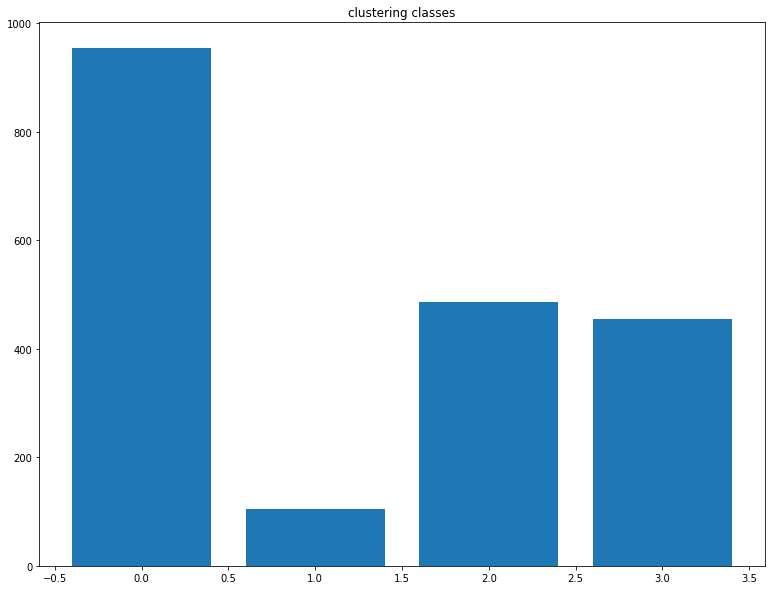

In [129]:
plt.figure(figsize=(13,10))
plt.title('clustering classes')
plt.bar(x = range(0,4), height = y_values)
plt.show()

In [130]:
u_labels = np.unique(label)
u_labels

array([0, 1, 2, 3])

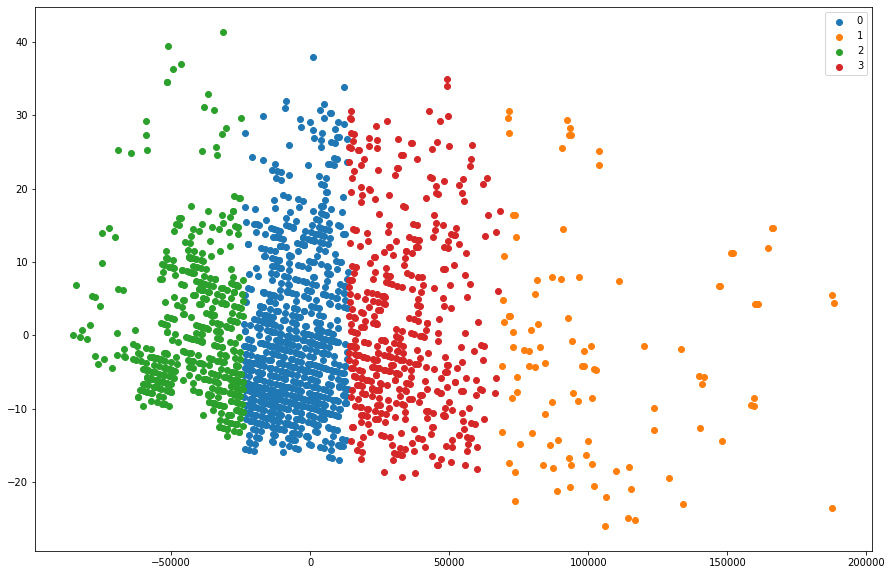

In [131]:
plt.figure(figsize = (15,10))
for i in u_labels:
    plt.scatter(data_plot[label == i , 0] , data_plot[label == i , 1] , label = i)

plt.legend()
plt.show()